# import

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import gender_guesser.detector as gender

import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier


# result

all the data

Accuracy: 71.92%

 Training Accuracy score: 0.7260510372682211
Testing Accuracy score: 0.719195182846233
classification_report 
               precision    recall  f1-score   support

           0       0.56      0.77      0.65      2309
           1       0.86      0.69      0.77      4500

    accuracy                           0.72      6809
   macro avg       0.71      0.73      0.71      6809
weighted avg       0.76      0.72      0.73      6809



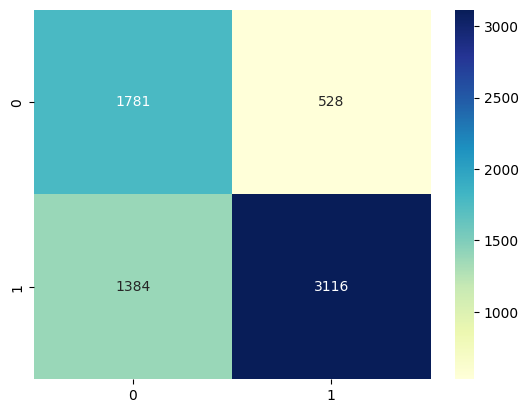

In [20]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import gender_guesser.detector as gender

import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.under_sampling import TomekLinks
df = pd.read_csv('./Data/data+descvf.csv')
# tl = TomekLinks()
x=df.iloc[:, :-3]
y = df.account_type.values.tolist()
# x, y = tl.fit_resample(x, y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

clf= MLPClassifier( max_iter=1000 )
clf.fit(x_train,y_train)
score = clf.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()
   

random undersampling  + Standardizing

Accuracy: 84.30%

 Training Accuracy score: 0.8692045454545455
Testing Accuracy score: 0.8429545454545454
classification_report 
               precision    recall  f1-score   support

           0       0.86      0.82      0.84      2200
           1       0.83      0.86      0.85      2200

    accuracy                           0.84      4400
   macro avg       0.84      0.84      0.84      4400
weighted avg       0.84      0.84      0.84      4400



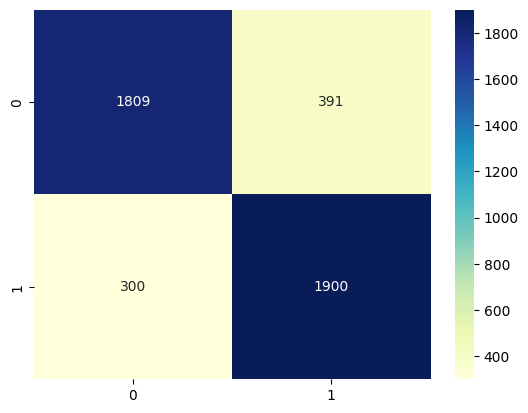

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
df = pd.read_csv('./Data/datavf.csv')

x=df.iloc[:, :-2]
y = df.account_type.values.tolist()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
pipeline = Pipeline([
    ('scaler', StandardScaler()), # Standardizing the data
    ('pca', PCA()), # Transforming the data with PCA
    ('rf',  MLPClassifier( max_iter=1000 )) # Training a random forest classifier on the data
])

# Train the pipeline on the data
pipeline.fit(x_train, y_train)

score = pipeline.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = pipeline.predict(x_train)
y_pred_test = pipeline.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

random undersampling 

Accuracy: 72.50%

 Training Accuracy score: 0.7255681818181818
Testing Accuracy score: 0.725
classification_report 
               precision    recall  f1-score   support

           0       0.67      0.91      0.77      2200
           1       0.85      0.54      0.66      2200

    accuracy                           0.73      4400
   macro avg       0.76      0.72      0.72      4400
weighted avg       0.76      0.72      0.72      4400



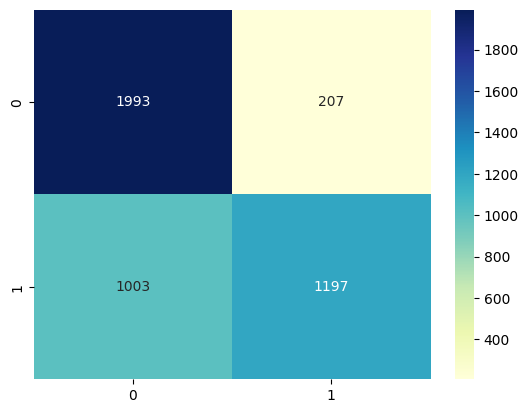

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
df = pd.read_csv('./Data/datavf.csv')

x=df.iloc[:, :-2]
y = df.account_type.values.tolist()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
pipeline = Pipeline([
    ('rf',  MLPClassifier( max_iter=1000 )) # Training a random forest classifier on the data
])

# Train the pipeline on the data
pipeline.fit(x_train, y_train)

score = pipeline.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = pipeline.predict(x_train)
y_pred_test = pipeline.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()


TomekLinks undersimpling 

Accuracy: 87.28%

 Training Accuracy score: 0.8828633405639913
Testing Accuracy score: 0.8727920669352339
classification_report 
               precision    recall  f1-score   support

           0       0.84      0.80      0.82      2309
           1       0.89      0.92      0.90      4145

    accuracy                           0.87      6454
   macro avg       0.86      0.86      0.86      6454
weighted avg       0.87      0.87      0.87      6454



d:\dsi\PFE\AI\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


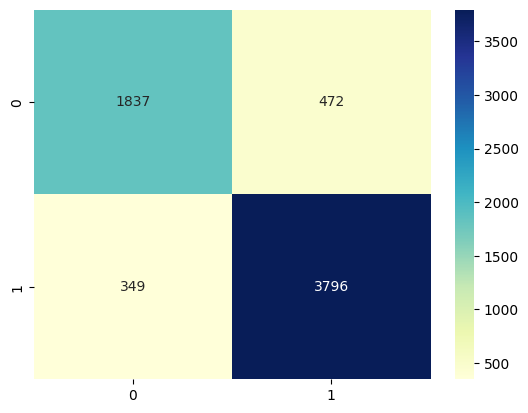

In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import gender_guesser.detector as gender

import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.under_sampling import TomekLinks
df = pd.read_csv('./Data/data+descvf.csv')
tl = TomekLinks()
x=df.iloc[:, :-3]
y = df.account_type.values.tolist()

x, y = tl.fit_resample(x, y)


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
clf = Pipeline([
    ('scaler', StandardScaler()), # Standardizing the data
    ('pca', PCA()), # Transforming the data with PCA
    ('rf',  MLPClassifier( max_iter=1000 )) # Training a random forest classifier on the data
])

# Train the pipeline on the data
clf.fit(x_train, y_train)
score = clf.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

tomlink + random undersimpling

Accuracy: 84.11%

 Training Accuracy score: 0.8487654320987654
Testing Accuracy score: 0.8410567345171069
classification_report 
               precision    recall  f1-score   support

           0       0.84      0.85      0.84      2309
           1       0.85      0.83      0.84      2309

    accuracy                           0.84      4618
   macro avg       0.84      0.84      0.84      4618
weighted avg       0.84      0.84      0.84      4618



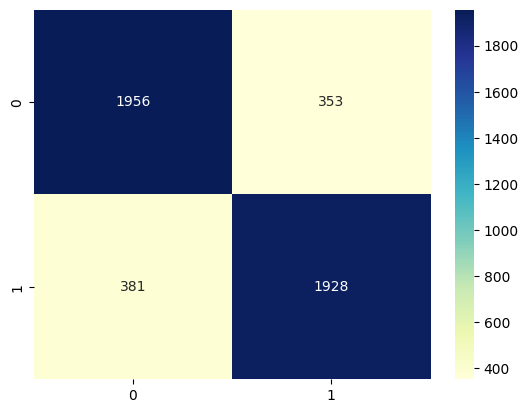

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import gender_guesser.detector as gender

import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.under_sampling import TomekLinks
df = pd.read_csv('./Data/data+descvf.csv')
tl = TomekLinks()
x=df.iloc[:, :-3]
y = df.account_type.values.tolist()

x, y = tl.fit_resample(x, y)
# Convert the list to a DataFrame
y = pd.DataFrame({'account_type': y})

# Concatenate the two DataFrames
data = pd.concat([x, y], axis=1)
df1=data[data.account_type== 1].head(11543)
df2=data[data.account_type== 0].head(11543)
df = pd.concat([df1, df2], ignore_index=True)
x=df.iloc[:, :-3]
y = df.account_type.values.tolist()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

clf = Pipeline([
    ('scaler', StandardScaler()), # Standardizing the data
    ('pca', PCA()), # Transforming the data with PCA
    ('rf',  MLPClassifier( max_iter=1000 )) # Training a random forest classifier on the data
])

# Train the pipeline on the data
clf.fit(x_train, y_train)
score = clf.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

oversampling

Accuracy: 86.33%

 Training Accuracy score: 0.8767534235160135
Testing Accuracy score: 0.8633485168314632
classification_report 
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      4501
           1       0.86      0.87      0.86      4500

    accuracy                           0.86      9001
   macro avg       0.86      0.86      0.86      9001
weighted avg       0.86      0.86      0.86      9001



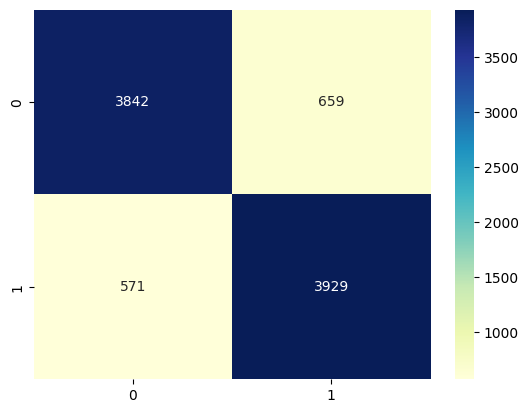

In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import gender_guesser.detector as gender
import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
df = pd.read_csv('./Data/data+descvf.csv')

smote = SMOTE(random_state=10)
x=df.iloc[:, :-3]
y = df.account_type.values.tolist()
x, y =smote.fit_resample(x, y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)


clf = Pipeline([
    ('scaler', StandardScaler()), # Standardizing the data
    ('pca', PCA()), # Transforming the data with PCA
    ('rf',  MLPClassifier( max_iter=1000 )) # Training a random forest classifier on the data
])

# Train the pipeline on the data
clf.fit(x_train, y_train)
score = clf.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

# with column relation

-oversimpling

Accuracy: 86.35%

 Training Accuracy score: 0.8834476820088331
Testing Accuracy score: 0.8634596155982669
classification_report 
               precision    recall  f1-score   support

           0       0.87      0.86      0.86      4501
           1       0.86      0.87      0.86      4500

    accuracy                           0.86      9001
   macro avg       0.86      0.86      0.86      9001
weighted avg       0.86      0.86      0.86      9001



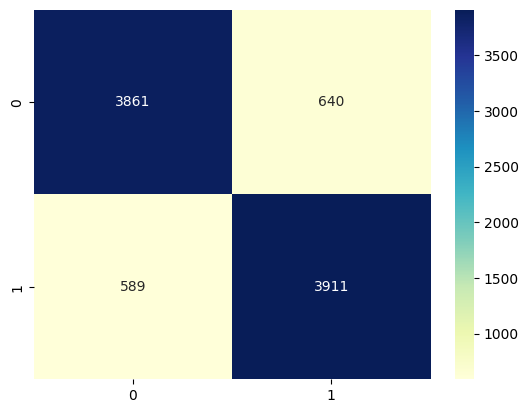

In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import gender_guesser.detector as gender
import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
df = pd.read_csv('./Data/data+column_relation.csv')
x=df.iloc[:, :-3]
y = df.account_type.values.tolist()
smote = SMOTE(random_state=10)
x, y =smote.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
pipeline = Pipeline([
    ('scaler', StandardScaler()), # Standardizing the data
    ('pca', PCA()), # Transforming the data with PCA
    ('rf',  MLPClassifier( max_iter=1000 )) # Training a random forest classifier on the data
])

# Train the pipeline on the data
pipeline.fit(x_train, y_train)

# feat_importances = pd.Series(pipeline['rf'].feature_importances_, index=x.columns)
# feat_importances.nlargest(20).plot(kind='barh')
# plt.show()
score = pipeline.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = pipeline.predict(x_train)
y_pred_test = pipeline.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

-random undersimpling

Accuracy: 91.82%

 Training Accuracy score: 0.9332386363636364
Testing Accuracy score: 0.9181818181818182
classification_report 
               precision    recall  f1-score   support

           0       0.95      0.88      0.91      2200
           1       0.89      0.96      0.92      2200

    accuracy                           0.92      4400
   macro avg       0.92      0.92      0.92      4400
weighted avg       0.92      0.92      0.92      4400



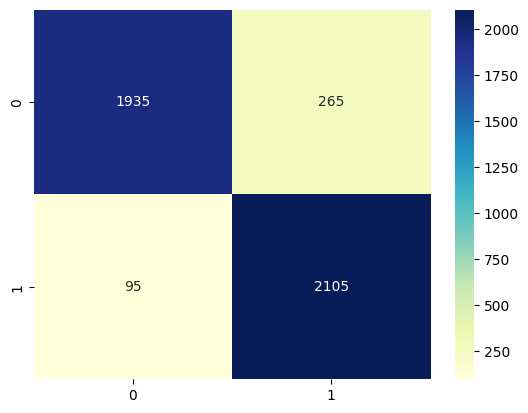

In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import gender_guesser.detector as gender
import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
data1 = pd.read_csv('./Data/data+column_relation.csv')

df1=data1[data1.account_type== 1].head(11000)
df2=data1[data1.account_type== 0].head(11000)
df = pd.concat([df1, df2], ignore_index=True)
x=df.iloc[:, :-3]
y = df.account_type.values.tolist()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
pipeline = Pipeline([
    ('scaler', StandardScaler()), # Standardizing the data
    ('pca', PCA()), # Transforming the data with PCA
    ('rf',  MLPClassifier( max_iter=1000 )) # Training a random forest classifier on the data
])

# Train the pipeline on the data
pipeline.fit(x_train, y_train)
score = pipeline.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = pipeline.predict(x_train)
y_pred_test = pipeline.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

tomklink undersimpling

Accuracy: 87.74%

 Training Accuracy score: 0.8942543024746513
Testing Accuracy score: 0.877408328154133
classification_report 
               precision    recall  f1-score   support

           0       0.86      0.79      0.82      2309
           1       0.89      0.92      0.91      4127

    accuracy                           0.88      6436
   macro avg       0.87      0.86      0.86      6436
weighted avg       0.88      0.88      0.88      6436



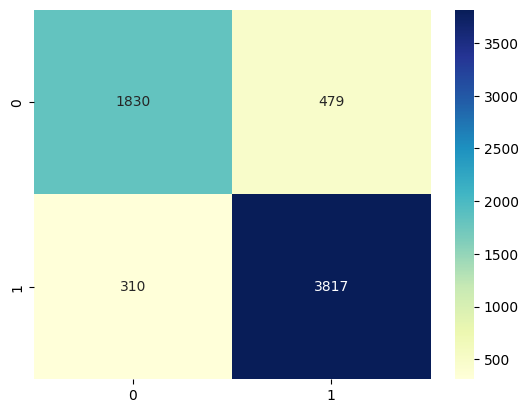

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import gender_guesser.detector as gender

import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.under_sampling import TomekLinks
df = pd.read_csv('./Data/data+column_relation.csv')

tl = TomekLinks()
x=df.iloc[:, :-3]
y = df.account_type.values.tolist()
x, y = tl.fit_resample(x, y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

clf = Pipeline([
    ('scaler', StandardScaler()), # Standardizing the data
    ('pca', PCA()), # Transforming the data with PCA
    ('rf',  MLPClassifier( max_iter=1000 )) # Training a random forest classifier on the data
])

# Train the pipeline on the data
clf.fit(x_train, y_train)
score = clf.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()
   

# with features selection

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import gender_guesser.detector as gender
import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
data1 = pd.read_csv('./Data/data+column_relation.csv')
data1=data1.loc[:,[ 'statuses', 'date_joined',
       'most_recent_post', 'following', 'followers',  'favourites', 'lists',
          'tweets_this_week','retweet', 'retweeted_count',
        'userNameScore', 
       'avg_tweets_by_day_of_week', 
       'engagment_rate', 'description', 'screen_name', 'account_type']]

# followers/lastpost - followers :negative 
# engagment rate - followers :positive 
# following - following/years:negative
# followers/lastpost - engagment rate : negative 
# tweet by houre -tweet by day : positive 


# 'verified', 'statuses', 'location', 'date_joined',
#        'most_recent_post', 'following', 'followers', 'favourites', 'lists',
#        'tweet_language', 'tweets_this_week', 'retweet', 'retweeted_count',
#        'url', 'userNameScore', 'avg_tweets_by_hour_of_day',
#        'avg_tweets_by_day_of_week', 'following/years', 'followers/lastpost',
#        'engagment_rate', 'description', 'screen_name', 'account_type'

# df=df.loc[:,['verified', 'statuses', 'location', 'date_joined',
#        'most_recent_post', 'following', 'followers', 'favourites', 'lists',
#        'tweet_language', 'tweets_this_week', 'retweet', 'retweeted_count',
#        'url', 'userNameScore', 'avg_tweets_by_hour_of_day',
#        'avg_tweets_by_day_of_week','description','screen_name','account_type']]



- random undersimpling 

Accuracy: 90.02%

 Training Accuracy score: 0.9066477272727272
Testing Accuracy score: 0.9002272727272728
classification_report 
               precision    recall  f1-score   support

           0       0.94      0.86      0.90      2200
           1       0.87      0.94      0.90      2200

    accuracy                           0.90      4400
   macro avg       0.90      0.90      0.90      4400
weighted avg       0.90      0.90      0.90      4400



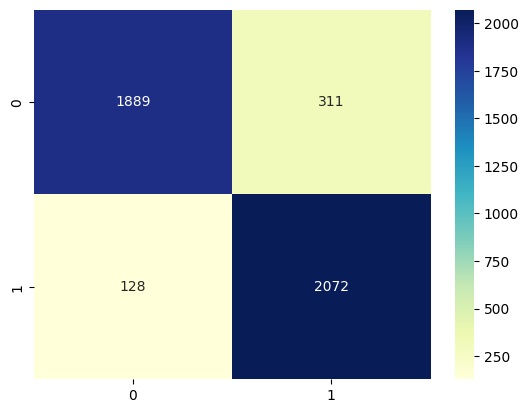

In [ ]:
df1=data1[data1.account_type== 1].head(11000)
df2=data1[data1.account_type== 0].head(11000)
df = pd.concat([df1, df2], ignore_index=True)
x=df.iloc[:, :-3]
y = df.account_type.values.tolist()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
pipeline = Pipeline([
    ('scaler', StandardScaler()), # Standardizing the data
    ('pca', PCA()), # Transforming the data with PCA
    ('rf',  MLPClassifier( max_iter=1000 )) # Training a random forest classifier on the data
])

# Train the pipeline on the data
pipeline.fit(x_train, y_train)

score = pipeline.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = pipeline.predict(x_train)
y_pred_test = pipeline.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

- oversimpling

Accuracy: 85.50%

 Training Accuracy score: 0.8653648509763617
Testing Accuracy score: 0.8550161093211865
classification_report 
               precision    recall  f1-score   support

           0       0.86      0.85      0.85      4501
           1       0.85      0.86      0.86      4500

    accuracy                           0.86      9001
   macro avg       0.86      0.86      0.86      9001
weighted avg       0.86      0.86      0.86      9001



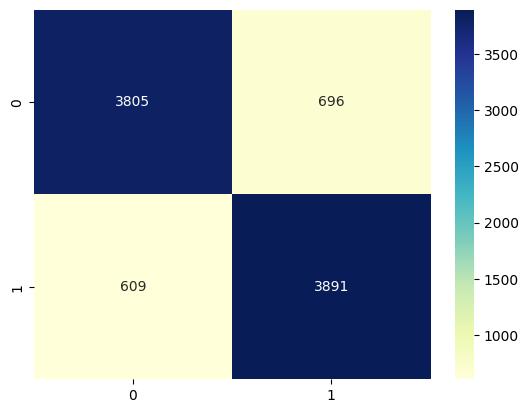

In [ ]:
from imblearn.over_sampling import SMOTE
df=data1
x=df.iloc[:, :-3]
y = df.account_type.values.tolist()

smote = SMOTE(random_state=10)
x, y =smote.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
pipeline = Pipeline([
    ('scaler', StandardScaler()), # Standardizing the data
    ('pca', PCA()), # Transforming the data with PCA
    ('rf',  MLPClassifier( max_iter=1000 )) # Training a random forest classifier on the data
])

# Train the pipeline on the data
pipeline.fit(x_train, y_train)
score = pipeline.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = pipeline.predict(x_train)
y_pred_test = pipeline.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)
cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

tomklink undersimpling

Accuracy: 87.11%

 Training Accuracy score: 0.8783752146090213
Testing Accuracy score: 0.8710986267166042
classification_report 
               precision    recall  f1-score   support

           0       0.85      0.78      0.81      2309
           1       0.88      0.92      0.90      4099

    accuracy                           0.87      6408
   macro avg       0.87      0.85      0.86      6408
weighted avg       0.87      0.87      0.87      6408



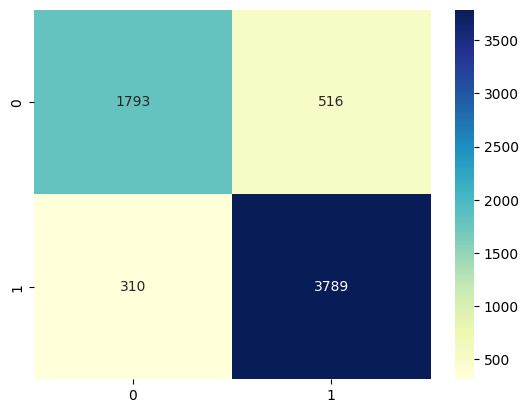

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import gender_guesser.detector as gender

import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.under_sampling import TomekLinks
df=data1
x=df.iloc[:, :-3]
y = df.account_type.values.tolist()
tl = TomekLinks()
x, y = tl.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
clf = Pipeline([
    ('scaler', StandardScaler()), # Standardizing the data
    ('pca', PCA()), # Transforming the data with PCA
    ('rf',  MLPClassifier( max_iter=1000 )) # Training a random forest classifier on the data
])

# Train the pipeline on the data
clf.fit(x_train, y_train)
score = clf.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()
   

# hyperparametre


In [ ]:
from sklearn.model_selection import GridSearchCV
# Creating lists of parameter for LogisticRegression
data1 = pd.read_csv('./Data/data+column_relation.csv')

df1=data1[data1.account_type== 1].head(11000)
df2=data1[data1.account_type== 0].head(11000)
df = pd.concat([df1, df2], ignore_index=True)
x=df.iloc[:, :-3]
y = df.account_type.values.tolist()
# Définir les paramètres pour MLPClassifier
param_grid = {
    'mlp__hidden_layer_sizes': [(10,), (20,), (30,)],
    'mlp__activation': ['logistic', 'relu'],
    'mlp__solver': ['sgd', 'adam'],
    'mlp__learning_rate': ['constant', 'adaptive']
}




pipe = Pipeline([
    ('scaler', StandardScaler()),
     ('pca', PCA()),
    ('mlp',MLPClassifier( max_iter=1000 ))
])

from sklearn.model_selection import GridSearchCV

clf_GS = GridSearchCV(pipe, param_grid=param_grid, cv = 3)

# Fitting the grid search
clf_GS.fit(x, y)

clf_GS.best_params_

{'mlp__activation': 'logistic',
 'mlp__hidden_layer_sizes': (20,),
 'mlp__learning_rate': 'constant',
 'mlp__solver': 'sgd'}

Accuracy: 88.70%

 Training Accuracy score: 0.8855113636363636
Testing Accuracy score: 0.8870454545454546
classification_report 
               precision    recall  f1-score   support

           0       0.93      0.84      0.88      2200
           1       0.85      0.93      0.89      2200

    accuracy                           0.89      4400
   macro avg       0.89      0.89      0.89      4400
weighted avg       0.89      0.89      0.89      4400



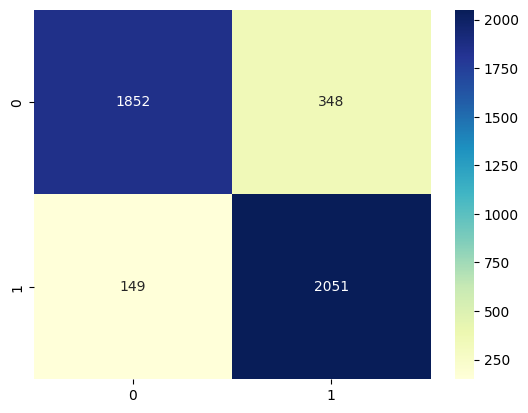

In [24]:
# {'mlp__activation': 'logistic',
#  'mlp__hidden_layer_sizes': (20,),
#  'mlp__learning_rate': 'constant',
#  'mlp__solver': 'sgd'}
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import gender_guesser.detector as gender
import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
data1 = pd.read_csv('./Data/data+column_relation.csv')

df1=data1[data1.account_type== 1].head(11000)
df2=data1[data1.account_type== 0].head(11000)
df = pd.concat([df1, df2], ignore_index=True)
x=df.iloc[:, :-3]
y = df.account_type.values.tolist()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
pipeline = Pipeline([
    ('scaler', StandardScaler()), # Standardizing the data
    ('pca', PCA()), # Transforming the data with PCA
    ('rf',  MLPClassifier(activation='logistic',hidden_layer_sizes=(20,),learning_rate='constant',solver='sgd', random_state=42,max_iter=1000)) 
])

# Train the pipeline on the data
pipeline.fit(x_train, y_train)
score = pipeline.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = pipeline.predict(x_train)
y_pred_test = pipeline.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

#  cross validation

undersimpling

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import gender_guesser.detector as gender
import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline

data1 = pd.read_csv('./Data/data+column_relation.csv')

df1=data1[data1.account_type== 1].head(11000)
df2=data1[data1.account_type== 0].head(11000)
df = pd.concat([df1, df2], ignore_index=True)
x=df.iloc[:, :-3]
y = df.account_type.values.tolist()

k_folds = KFold(n_splits = 10)
clf = Pipeline([
     ('scaler', StandardScaler()), # Standardizing the data
    ('pca', PCA()), 
    ('rf', MLPClassifier( max_iter=1000,random_state=42 )) # Training a random forest classifier on the data
])
scores = cross_val_score(clf, x, y, cv = k_folds)

print("Average CV Score: ", scores.mean())


Average CV Score:  0.7137272727272727


oversimpling

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import gender_guesser.detector as gender
import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
data1 = pd.read_csv('./Data/data+column_relation.csv')
x=data1.iloc[:, :-3]
y = data1.account_type.values.tolist()

smote = SMOTE(random_state=10)
x, y =smote.fit_resample(x, y)
k_folds = KFold(n_splits = 10)
clf = Pipeline([
     ('scaler', StandardScaler()), # Standardizing the data
    ('pca', PCA()), 
    ('rf', MLPClassifier( max_iter=1000,random_state=42 )) # Training a random forest classifier on the data
])
scores = cross_val_score(clf, x, y, cv = k_folds)

print("Average CV Score: ", scores.mean())


d:\dsi\PFE\AI\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
